# Homework 9: Programming Exercises

Before you get started you might want to run the following cell (and potentially add your own import lines to it later on):

In [1]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import math, random

This question is about an experiment we did in the first lecture. We have seen that the following code estimates the answer to the question:

> We roll a fair die repeatedly until we roll a 6. How many rolls do we expect given than all the rolls gave even numbers?

In [27]:
def single_trial():
    num_rolls = 0
    while True:
        num_rolls = num_rolls + 1
        die_roll = randint(1, 7) # fair die roll
        if die_roll == 1 or die_roll == 3 or die_roll == 5:
            # restart the experiment
            num_rolls = 0
            continue
        if die_roll == 6:
            break
    return num_rolls

# use 10000 trials
def estimate_expected_rolls(num_trials = 10000):
    total = 0.0
    for i in range(num_trials):
        total += single_trial()
    
    return (total / num_trials)

In [28]:
print(estimate_expected_rolls())

1.4961


You now know that the above question is asking for the conditional expectation of the number of die rolls until we roll a 6, conditioned on the event that all of the rolls are 2, 4, or 6.

Consider the following modified version of the above question and experiment. Instead of a fair $6$-sided die, we now have a fair $k$-sided die with the numbers $1$ through $k$ written on it. The question we are interested in is the following:

> What is the expected number of rolls of the $k$-sided die until we roll a $6$, given that all the rolls are 2, 4, or 6?

### Exercise 1a

Write a function that takes as input an integer $k \geq 6$ and it returns an estimate of the expected number of rolls of the $k$-sided die until we roll a 6, given that all the results are 2, 4, or 6.

In [4]:
def single_trial_k(k):
    num_rolls = 0
    die_list = []
    for i in range(k):
        die_list.append(2)
        die_list.append(4)
        die_list.append(6)
    while True:
        num_rolls = num_rolls + 1
        die_roll = random.choice(die_list) # fair die roll
        if die_roll == 6:
            break
    return num_rolls

# use 10000 trials
def estimate_expected_rolls_k(num_trials = 10000, k = 6):
    total = 0.0
    for i in range(num_trials):
        total += single_trial_k(k)
    
    return (total / num_trials)

print(estimate_expected_rolls_k())

2.952


### Exercise 1b

Next, pick some large values of $k$ and time your code.

In [6]:
import timeit

start = timeit.default_timer()
print('estimate for k=100: ', estimate_expected_rolls_k(k = 100))
stop = timeit.default_timer()
print('runtime: ', stop - start)  
print()

start = timeit.default_timer()
print('estimate for k=3000: ', estimate_expected_rolls_k(k = 3000))
stop = timeit.default_timer()
print('runtime: ', stop - start)  
print()

start = timeit.default_timer()
print('estimate for k=8000: ', estimate_expected_rolls_k(k = 8000))
stop = timeit.default_timer()
print('runtime: ', stop - start)  
print()

start = timeit.default_timer()
print('estimate for k=10000: ', estimate_expected_rolls_k(k = 10000))
stop = timeit.default_timer()
print('runtime: ', stop - start)
print()

pass

estimate for k=100:  2.9459
runtime:  0.1740016250000167

estimate for k=3000:  3.0104
runtime:  3.462776833000021

estimate for k=8000:  2.9962
runtime:  9.568705874999978

estimate for k=10000:  3.016
runtime:  11.94788141700002



### Exercise 1c

What do you think happens as $k\to \infty$?

<b>Answer:</b> as $k\to \infty$ the runtime will be longer and the estimate will getting closer to 3.00 and being more stable around 3.00

## Exercise 2a
In this exercise, you will simulate throwing darts at a dartboard at random.  Recall the method for sampling from a disk of radius 1 (Lecture 5, Slide 19).  Let $D$ be the distance from the center of the dartboard (0,0) to the point sampled from the disk.  Average the results of 10,000 samples to give an empirical estimate of Ex$[D]$.

In [29]:
def single_trial_d():
    distance = 0
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distance = math.sqrt(x**2 + y**2)
    if distance > 1:
        single_trial_d()
    return distance

# use 10000 trials
def estimate_expected_rolls_d(num_trials = 10000):
    total = 0.0
    for i in range(num_trials):
        total += single_trial_d()
    
    return (total / num_trials)

print(estimate_expected_rolls_d())

0.7643553015593718


## Exercise 2b
Observe that the area of the dartboard is $\pi \cdot 1^2 = \pi$ and the area of the square around the dartboard is $2^2 = 4$.  Use the ratio of hits and misses from (2a) to give an estimate for $\pi$.

In [41]:
def single_trial_throw():
    distance = 0
    miss = 0
    hit = 1
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distance = math.sqrt(x**2 + y**2)
    if distance > 1:
        return miss
    else:
        return hit

# use 10000 trials
def estimate_expected_hit(num_trials = 10000):
    total = 0.0
    for i in range(num_trials):
        total += single_trial_throw()
    
    return (total / num_trials)

print(estimate_expected_hit()*4) #Pr(hit) = pi/4, so 4*Pr(hit) = pi

3.1448


## Exercise 2c
The simulation method in (2a) wastes some randomness, as samples outside the disk are discarded.  Implement an alternative (discard-free) method for throwing darts at random by picking a random angle $\Theta$ between (0, 360) degrees and a Distance d from the CDF for $D$ as set up for you below, then translating that into x- and y-coordinates (which we can think of as random variables $X$ and $Y$).  Print Ex$[X]$, Ex$[Y]$, and Ex$[D]$ to verify that your samples turned out as expected. 

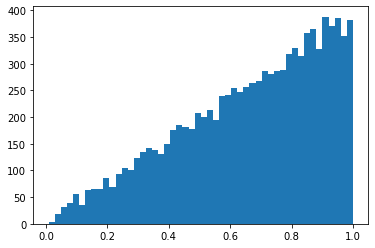

In [42]:
#  Sample from D using inverse transform sampling:  https://en.wikipedia.org/wiki/Inverse_transform_sampling
#  CDF of D:  x^2                   for x in [0, 1], see lecture notes
#  Inverse-CDF of D: \sqrt(x)       for x in [0, 1]
#
def inverse_cdf_of_D (x):
    return math.sqrt(x)

def D ():
    uniform_random_sample = random.random()
    return inverse_cdf_of_D(uniform_random_sample)

samples = [D() for i in range(10000)]

# Uncomment lines below to see plot
plt.hist(samples, bins=50)
plt.show()

In [55]:
def discard_free_single_trial_throw():
    theta = randint(0, 360)
    d = D()
    x = d*math.cos(theta)
    y = d*math.sin(theta)
    result = [x, y, d]
    return result

In [56]:
def discard_free_estimate_expected_throw(num_trials = 10000):
    total_x = 0.0
    total_y = 0.0
    total_d = 0.0
    for i in range(num_trials):
        result = discard_free_single_trial_throw()
        total_x += result[0]
        total_y += result[1]
        total_d += result[2]
    
    print(total_x / num_trials)
    print(total_y / num_trials)
    print(total_d / num_trials)

discard_free_estimate_expected_throw()

0.013784973342560392
-0.0044652162211087166
0.6709033451821534
